<a href="https://colab.research.google.com/github/mehri-satari/Data-Mining-Course-Project/blob/main/Hossain_Tanzina_Assignment_5(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

**1 Dataset Collection & Preparation**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Amazon_Product_Reviews.csv")
label_map = {
    "Negative": -1,
    "Neutral": 0,
    "Positive": 1
}

df["category"] = df["SA"].map(label_map)
df.head()


,review_text,SA,category
0,"The pump dispenser is a nice touch, making it ...",Positive,1
1,I have a hard time finding smells that aren't ...,Negative,-1
2,I’ve been using this product for years. It’s g...,Positive,1
3,This product is wonderful to use. I have dry ...,Positive,1
4,It's nice and creamy. It leaves skin soft and...,Positive,1


In [ ]:
df['category'].value_counts()


,count
category,
1,33
-1,24
0,13


**2. Exploratory Data Analysis (EDA)**



In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)


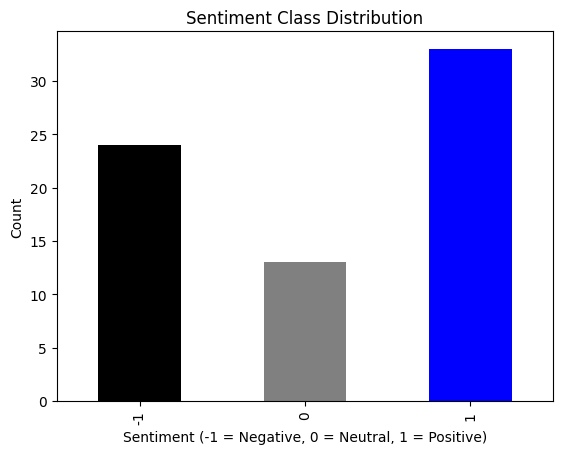

In [ ]:
import matplotlib.pyplot as plt

df['category'].value_counts().sort_index().plot(kind='bar', color=['black','gray','blue'])
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Count")
plt.show()


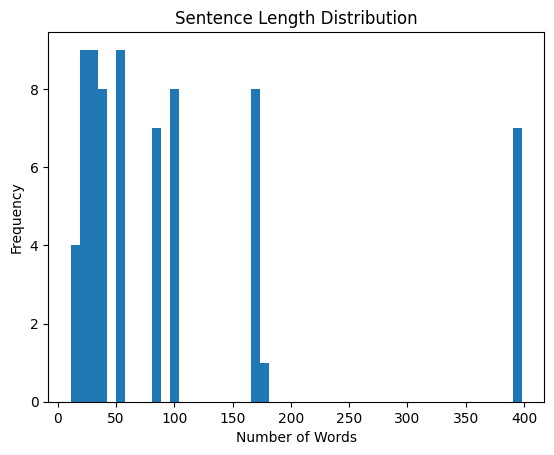

In [ ]:
# use clean_text instead of processed_text

df['text_length'] = df['review_text'].apply(lambda x: len(str(x).split()))

plt.hist(df['text_length'], bins=50)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()



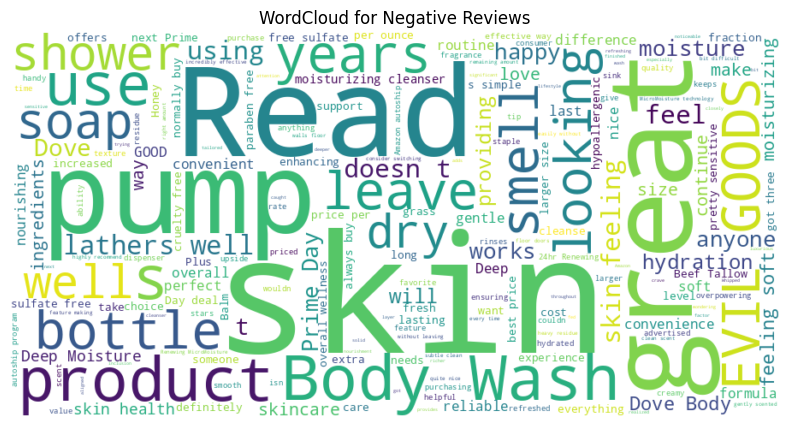

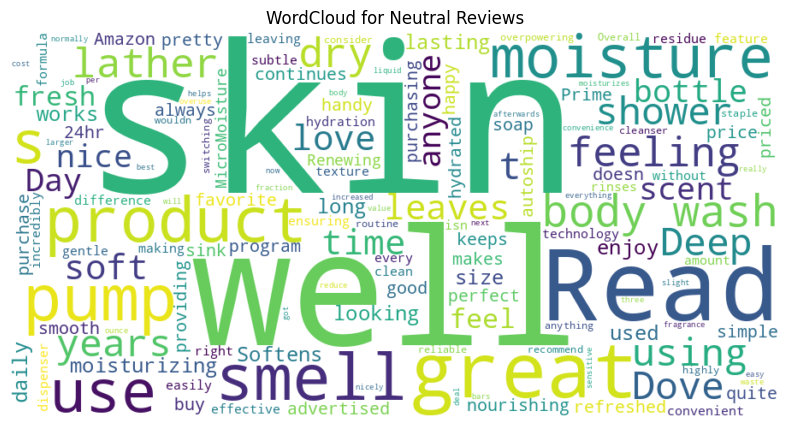

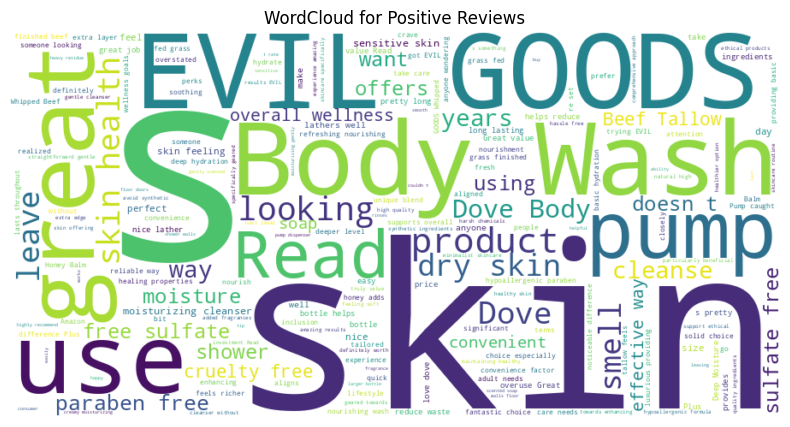

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label, name in [(-1, "Negative"), (0, "Neutral"), (1, "Positive")]:
    text = " ".join(df[df['category'] == label]['review_text'].astype(str))

    wc = WordCloud(
        width=900,
        height=450,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"WordCloud for {name} Reviews")
    plt.axis("off")
    plt.show()



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Use clean_text since processed_text does not exist
vectorizer = CountVectorizer(
    ngram_range=(2, 2),
    max_features=20,
    stop_words='english'
)

X_bigrams = vectorizer.fit_transform(df['clean_text'].astype(str))

bigram_df = pd.DataFrame(
    vectorizer.get_feature_names_out(),
    columns=['Top Bigrams']
)

bigram_df


,Top Bigrams
0,beef tallow
1,body wash
2,cruelty free
3,deep moisture
4,dove body
5,dove great
6,dry skin
7,evil goods
8,feeling soft
9,free cruelty


**3. Sentiment Classification**

In [ ]:
# drop rows where category is missing
df = df.dropna(subset=['category'])

# also drop missing text just in case
df = df.dropna(subset=['review_text'])

df['category'] = df['category'].astype(int)  # ensure int labels

df.head()


,review_text,SA,category,text_length
0,"The pump dispenser is a nice touch, making it ...",Positive,1,102
1,I have a hard time finding smells that aren't ...,Negative,-1,34
2,I’ve been using this product for years. It’s g...,Positive,1,175
3,This product is wonderful to use. I have dry ...,Positive,1,28
4,It's nice and creamy. It leaves skin soft and...,Positive,1,20


In [ ]:
df['category'].isna().sum()


np.int64(0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['review_text'].astype(str)
y = df['category']  # -1, 0, 1

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


**4. Evaluation & Reporting**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=300)
lr.fit(X_train_tfidf, y_train)

pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Results:")
print(classification_report(y_test, pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

          -1       0.50      0.40      0.44         5
           0       0.00      0.00      0.00         2
           1       0.56      0.71      0.62         7

    accuracy                           0.50        14
   macro avg       0.35      0.37      0.36        14
weighted avg       0.46      0.50      0.47        14



In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

pred_svm = svm.predict(X_test_tfidf)

print("SVM Results:")
print(classification_report(y_test, pred_svm))


SVM Results:
              precision    recall  f1-score   support

          -1       0.50      0.40      0.44         5
           0       0.00      0.00      0.00         2
           1       0.50      0.57      0.53         7

    accuracy                           0.43        14
   macro avg       0.33      0.32      0.33        14
weighted avg       0.43      0.43      0.43        14



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Results:")
print(classification_report(y_test, pred_nb))


Naive Bayes Results:
              precision    recall  f1-score   support

          -1       0.40      0.40      0.40         5
           0       0.00      0.00      0.00         2
           1       0.56      0.71      0.62         7

    accuracy                           0.50        14
   macro avg       0.32      0.37      0.34        14
weighted avg       0.42      0.50      0.46        14



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


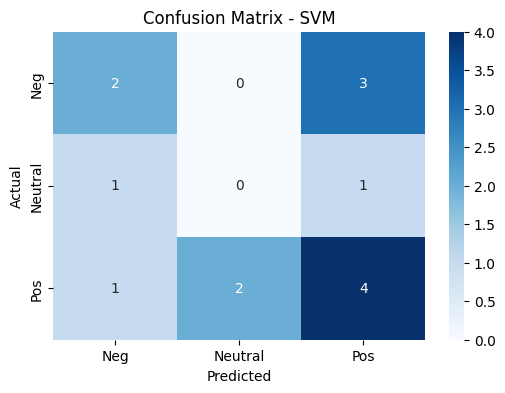

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Neg','Neutral','Pos'],
            yticklabels=['Neg','Neutral','Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


**1. EDA on test and Train Dataset**



In [ ]:
#Importing dataset in the setup
import pandas as pd

train_path = "/content/stsa-train.txt"
test_path = "/content/stsa-test.txt"

def load_sst_file(path):
    texts = []
    labels = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            parts = line.strip().split(" ", 1)
            if len(parts) == 2:
                labels.append(int(parts[0]))
                texts.append(parts[1])
    return pd.DataFrame({"text": texts, "label": labels})

train_df = load_sst_file(train_path)
test_df = load_sst_file(test_path)

train_df.head(), train_df['label'].value_counts()



(                                                text  label
 0  a stirring , funny and finally transporting re...      1
 1  apparently reassembled from the cutting-room f...      0
 2  they presume their audience wo n't sit still f...      0
 3  this is a visually stunning rumination on love...      1
 4  jonathan parker 's bartleby should have been t...      1,
 label
 1    3610
 0    3310
 Name: count, dtype: int64)

In [ ]:
train_df.head(), test_df.head()


(                                                text  label
 0  a stirring , funny and finally transporting re...      1
 1  apparently reassembled from the cutting-room f...      0
 2  they presume their audience wo n't sit still f...      0
 3  this is a visually stunning rumination on love...      1
 4  jonathan parker 's bartleby should have been t...      1,
                                                 text  label
 0     no movement , no yuks , not much of anything .      0
 1  a gob of drivel so sickly sweet , even the eag...      0
 2  gangs of new york is an unapologetic mess , wh...      0
 3  we never really feel involved with the story ,...      0
 4            this is one of polanski 's best films .      1)

In [ ]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (6920, 2)
Test shape: (1821, 2)


In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())


text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


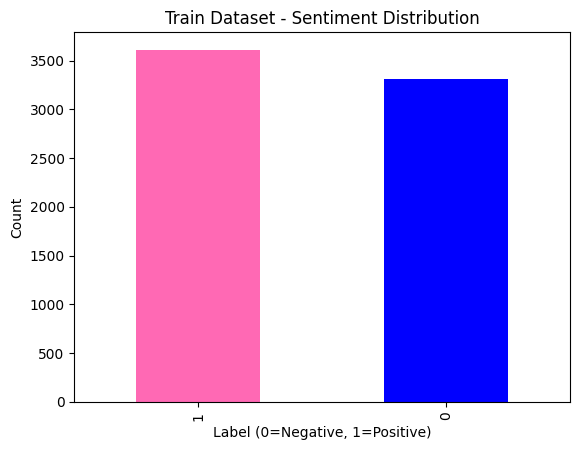

In [ ]:
import matplotlib.pyplot as plt
train_df['label'].value_counts().plot(kind='bar', color=['hotpink','blue'])
plt.title("Train Dataset - Sentiment Distribution")
plt.xlabel("Label (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()


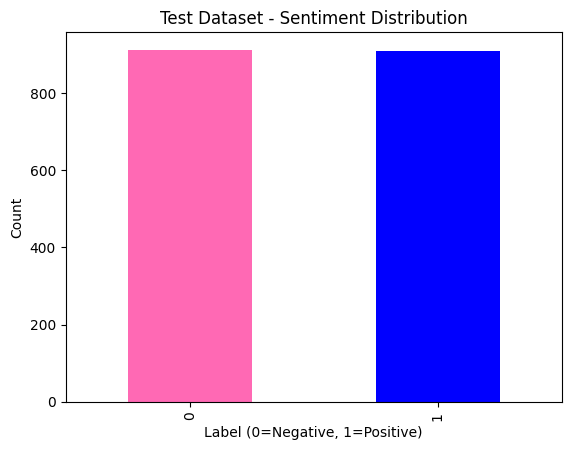

In [ ]:
test_df['label'].value_counts().plot(kind='bar', color=['hotpink','blue'])
plt.title("Test Dataset - Sentiment Distribution")
plt.xlabel("Label (0=Negative, 1=Positive)")
plt.ylabel("Count")
plt.show()


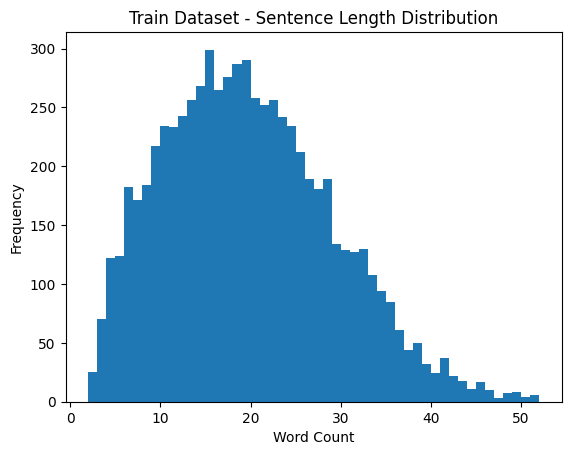

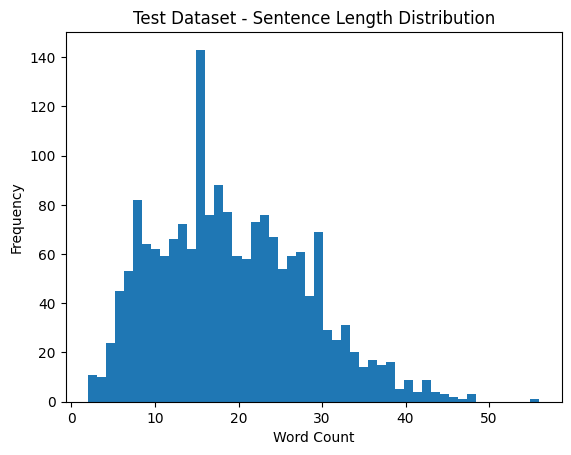

In [ ]:
import matplotlib.pyplot as plt

train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))
test_df['length'] = test_df['text'].apply(lambda x: len(x.split()))

plt.hist(train_df['length'], bins=50)
plt.title("Train Dataset - Sentence Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

plt.hist(test_df['length'], bins=50)
plt.title("Test Dataset - Sentence Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("Sample Positive Review:\n", train_df[train_df['label']==1].iloc[0]['text'])
print("\nSample Negative Review:\n", train_df[train_df['label']==0].iloc[0]['text'])


Sample Positive Review:
 a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films

Sample Negative Review:
 apparently reassembled from the cutting-room floor of any given daytime soap .


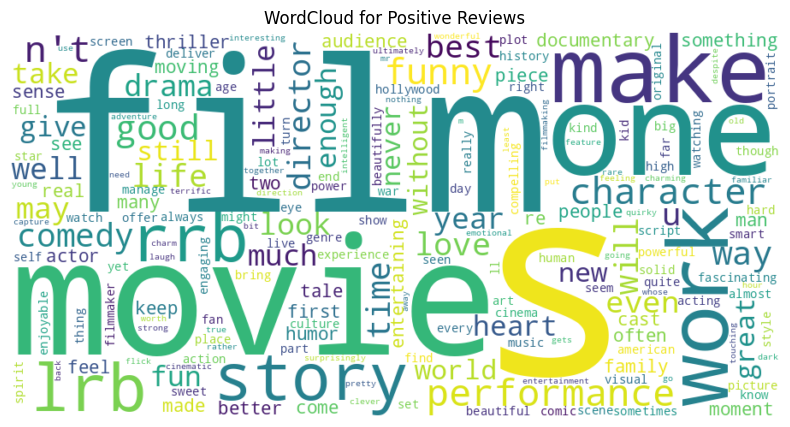

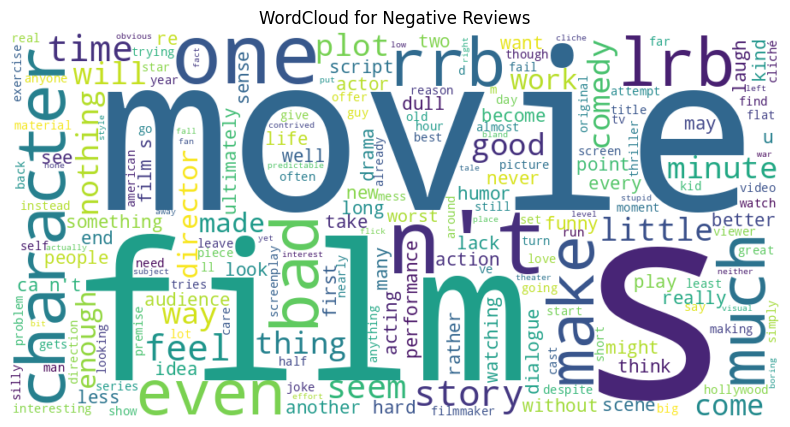

In [ ]:
from wordcloud import WordCloud

# Positive
pos_text = " ".join(train_df[train_df['label']==1]["text"])
wc1 = WordCloud(width=900, height=450, background_color="white").generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Positive Reviews")
plt.show()

# Negative
neg_text = " ".join(train_df[train_df['label']==0]["text"])
wc2 = WordCloud(width=900, height=450, background_color="white").generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for Negative Reviews")
plt.show()


**2. Training Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = train_df['text']
y = train_df['label']

# 80/20 train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(test_df['text'])


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 10-fold CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

def evaluate_cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    return scores.mean(), scores.std()


SVM

In [ ]:
svm_model = LinearSVC()
svm_cv_mean, svm_cv_std = evaluate_cv(svm_model, X_train_tfidf, y_train)

svm_model.fit(X_train_tfidf, y_train)
svm_val_pred = svm_model.predict(X_val_tfidf)

print("SVM 10-fold CV Accuracy:", svm_cv_mean)


SVM 10-fold CV Accuracy: 0.7743936911235728


KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

# convert sparse → dense
X_train_dense = X_train_tfidf.toarray()
X_val_dense = X_val_tfidf.toarray()

knn_cv_mean, knn_cv_std = evaluate_cv(knn_model, X_train_dense, y_train)

knn_model.fit(X_train_dense, y_train)
knn_val_pred = knn_model.predict(X_val_dense)

print("KNN 10-fold CV Accuracy:", knn_cv_mean)




KNN 10-fold CV Accuracy: 0.5204320379159295


Decision Tree

In [ ]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_mean, dt_cv_std = evaluate_cv(dt_model, X_train_tfidf, y_train)

dt_model.fit(X_train_tfidf, y_train)
dt_val_pred = dt_model.predict(X_val_tfidf)

print("Decision Tree 10-fold CV Accuracy:", dt_cv_mean)


Decision Tree 10-fold CV Accuracy: 0.6058538591600786


Random Forest

In [ ]:

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_cv_mean, rf_cv_std = evaluate_cv(rf_model, X_train_tfidf, y_train)

rf_model.fit(X_train_tfidf, y_train)
rf_val_pred = rf_model.predict(X_val_tfidf)

print("Random Forest 10-fold CV Accuracy:", rf_cv_mean)


Random Forest 10-fold CV Accuracy: 0.7073801581136042


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on test data using SVM (best model)
test_pred = svm_model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(test_df['label'], test_pred))
print("Precision:", precision_score(test_df['label'], test_pred))
print("Recall:", recall_score(test_df['label'], test_pred))
print("F1 Score:", f1_score(test_df['label'], test_pred))

print("\nClassification Report:\n")
print(classification_report(test_df['label'], test_pred))


Accuracy: 0.785282811641955
Precision: 0.7749469214437368
Recall: 0.8030803080308031
F1 Score: 0.788762830902215

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       912
           1       0.77      0.80      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



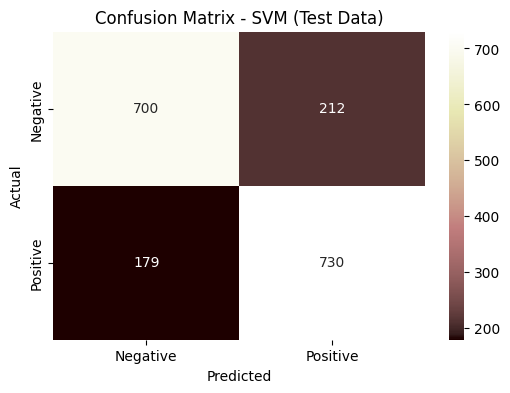

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_df['label'], test_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='pink', fmt='g',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Test Data)")
plt.show()


**3. Final Model Evaluation on Test Dataset**

SVM is selected as the final model for evaluation on the test dataset having highest accuracy.

SVM Performance on Test Data

Accuracy: 0.7853

Precision: 0.7749

Recall: 0.8030

F1-Score: 0.7887

These results show that the SVM model performs well on both positive and negative reviews, achieving a strong balance between precision and recall. The F1-score close to 0.79 indicates that the classifier is reliable and not overly biased toward either class.

## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

**1. EDA**

In [ ]:
# Write your code here
import pandas as pd

df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
df.head(), df.columns


(                                        Product Name Brand Name   Price  \
 0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
 1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
 2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
 3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
 4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
 
    Rating                                            Reviews  Review Votes  
 0       5  I feel so LUCKY to have found this used (phone...           1.0  
 1       4  nice phone, nice up grade from my pantach revu...           0.0  
 2       5                                       Very pleased           0.0  
 3       4  It works good but it goes slow sometimes but i...           0.0  
 4       4  Great phone to replace my lost phone. The only...           0.0  ,
 Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
     

In [ ]:
TEXT_COL = "Reviews"
df = df[[TEXT_COL]].rename(columns={TEXT_COL: "text"})
df.dropna(subset=["text"], inplace=True)
df.head()


,text
0,I feel so LUCKY to have found this used (phone...
1,"nice phone, nice up grade from my pantach revu..."
2,Very pleased
3,It works good but it goes slow sometimes but i...
4,Great phone to replace my lost phone. The only...


In [ ]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())


Shape: (413770, 1)

Missing values:
 text    0
dtype: int64


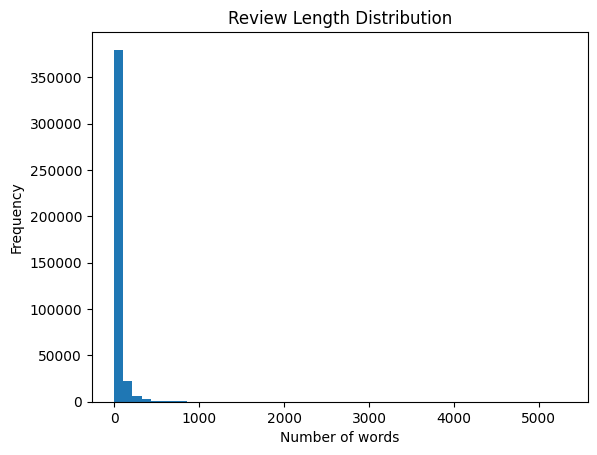

,length
count,413770.000000
mean,40.492902
std,85.235889
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,5313.000000


In [ ]:
import matplotlib.pyplot as plt

df["length"] = df["text"].apply(lambda x: len(str(x).split()))

plt.hist(df["length"], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

df["length"].describe()


In [ ]:
df.sample(5, random_state=42)["text"]


,text
262853,I needed a texting phone that did not require ...
70999,Excellent!
324745,I recommend this excellent team for the many d...
114637,updated review. Purchased this phone on Novemb...
221325,battery fail


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"http\S+|www\S+", "", t)
    t = re.sub(r"[^a-z\s]", " ", t)
    tokens = [w for w in t.split() if w not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df[["text", "clean_text"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,clean_text
0,I feel so LUCKY to have found this used (phone...,feel lucky found used phone us used hard phone...
1,"nice phone, nice up grade from my pantach revu...",nice phone nice grade pantach revue clean set ...
2,Very pleased,pleased
3,It works good but it goes slow sometimes but i...,works good goes slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,great phone replace lost phone thing volume bu...


**TEXT CLUSTERING**

In [ ]:
sample_df = df.sample(10000, random_state=42)
texts = sample_df["clean_text"].tolist()
len(texts)


10000

**Clustering Method 1: TF-IDF + K-Means**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(texts)

# K-means
k = 5  # choose 5 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

sample_df["kmeans_cluster"] = kmeans_labels
sample_df[["text", "kmeans_cluster"]].head()


,text,kmeans_cluster
262853,I needed a texting phone that did not require ...,0
70999,Excellent!,0
324745,I recommend this excellent team for the many d...,0
114637,updated review. Purchased this phone on Novemb...,0
221325,battery fail,0


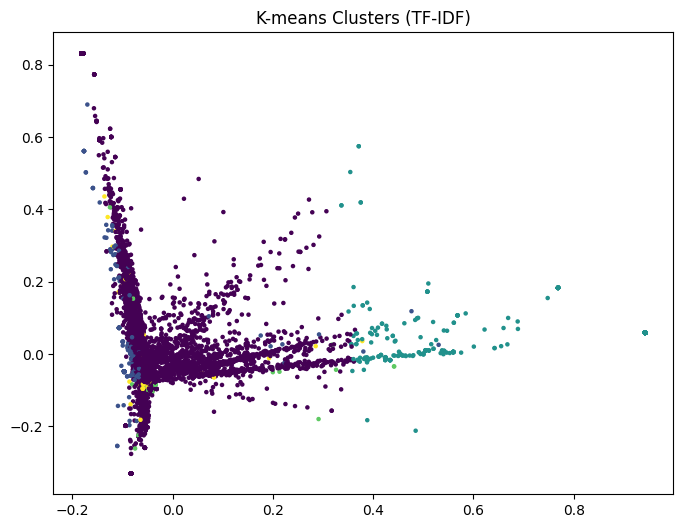

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=kmeans_labels, cmap="viridis", s=5)
plt.title("K-means Clusters (TF-IDF)")
plt.show()


**Clustering Method 2: TF-IDF + DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=10, metric="euclidean")
db_labels = dbscan.fit_predict(X_tfidf.toarray())

sample_df["dbscan_cluster"] = db_labels
sample_df["dbscan_cluster"].value_counts()


,count
dbscan_cluster,
-1,8545
6,260
0,134
11,113
12,89
4,85
15,79
3,78
8,68


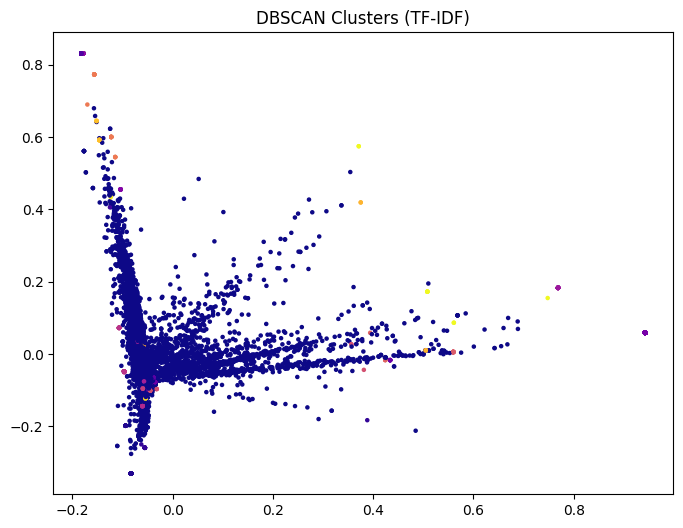

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=db_labels, cmap="plasma", s=5)
plt.title("DBSCAN Clusters (TF-IDF)")
plt.show()


**Clustering Method 3: Hierarchical Clustering (Agglomerative)**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=5)
hier_labels = hier.fit_predict(X_tfidf.toarray())

sample_df["hier_cluster"] = hier_labels
sample_df["hier_cluster"].value_counts()


,count
hier_cluster,
0,9222
1,308
2,209
3,148
4,113


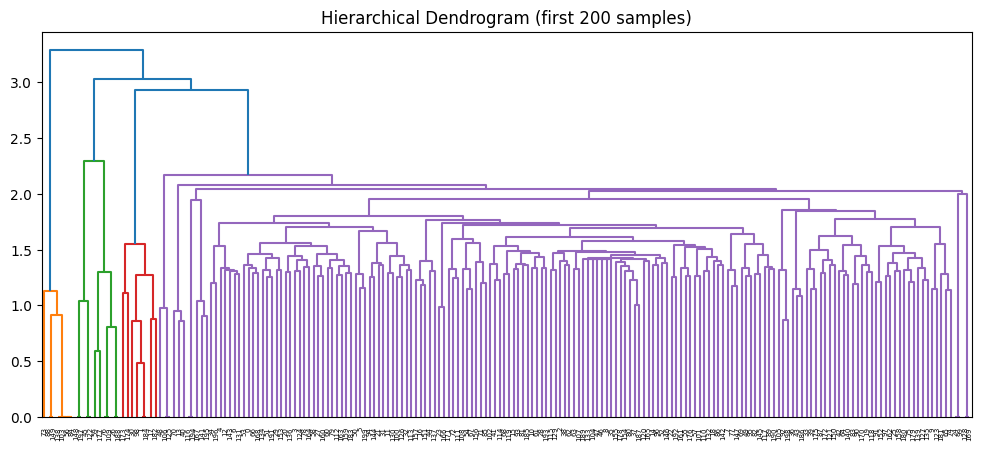

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 5))
sch.dendrogram(sch.linkage(X_tfidf[:200].toarray(), method='ward'))
plt.title("Hierarchical Dendrogram (first 200 samples)")
plt.show()


**Clustering Method 4: Word2Vec Embedding Clustering**

In [ ]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.0 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
import numpy as np

# tokenize
tokenized = [t.split() for t in texts]

# train word2vec
w2v = Word2Vec(tokenized, vector_size=100, window=5, min_count=2)

# get sentence embeddings = mean of word vectors
def sent_vector(words):
    vec = [w2v.wv[w] for w in words if w in w2v.wv]
    return np.mean(vec, axis=0) if len(vec)>0 else np.zeros(100)

w2v_vectors = np.array([sent_vector(t.split()) for t in texts])

# cluster sentence-level embeddings
kmeans_w2v = KMeans(n_clusters=5, random_state=42)
w2v_labels = kmeans_w2v.fit_predict(w2v_vectors)

sample_df["word2vec_cluster"] = w2v_labels
sample_df[["text", "word2vec_cluster"]].sample(10)


,text,word2vec_cluster
394589,Beyond expectations!,4
378000,I love this phone. Absolutely great! This phon...,2
247886,I can honestly say I hate this. I have wasted ...,4
366313,I bought the phone as a new phone but it came ...,2
39589,this phone have bad quality the sound barley w...,2
397704,Very good phone for less money,2
184453,Great phone. I bought it for my Aunt (89) She ...,2
405537,it broke less then a month,4
19737,I've had the phone for about a month now and a...,4
323528,This item is NOT unlocked for other carriers o...,4


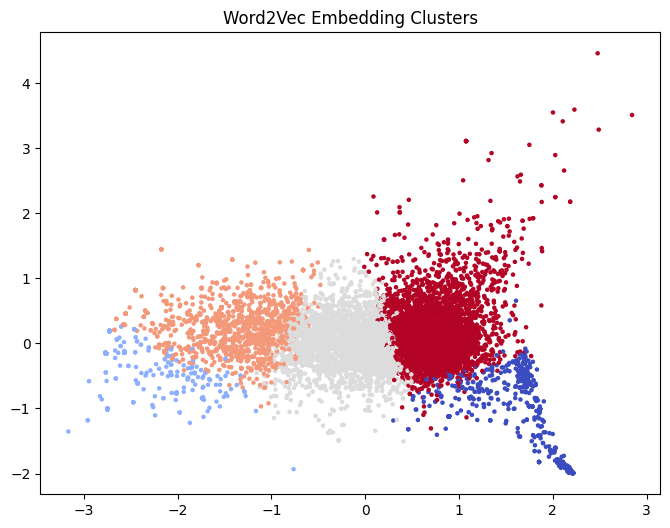

In [ ]:
pca = PCA(n_components=2)
reduced_w2v = pca.fit_transform(w2v_vectors)

plt.figure(figsize=(8,6))
plt.scatter(reduced_w2v[:,0], reduced_w2v[:,1], c=w2v_labels, cmap="coolwarm", s=5)
plt.title("Word2Vec Embedding Clusters")
plt.show()


Visualization of K-Means Clusters

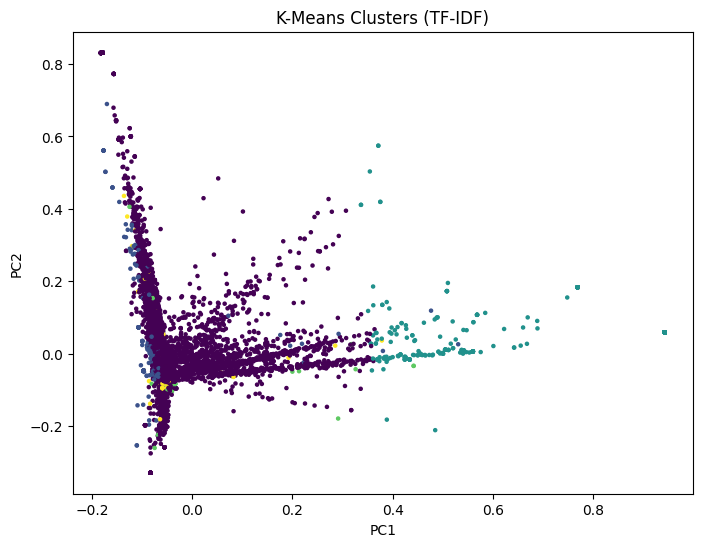

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=kmeans_labels, cmap="viridis", s=5)
plt.title("K-Means Clusters (TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Visualization of DBSCAN Clusters

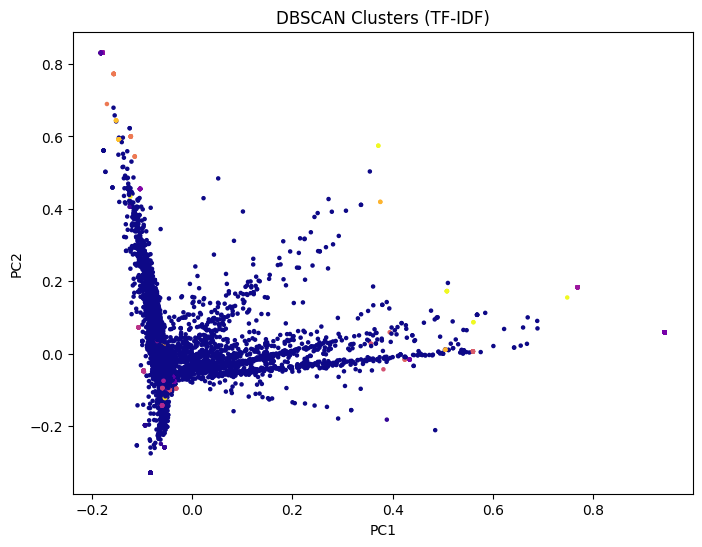

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=db_labels, cmap="plasma", s=5)
plt.title("DBSCAN Clusters (TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Visualization of Hierarchical Clusters

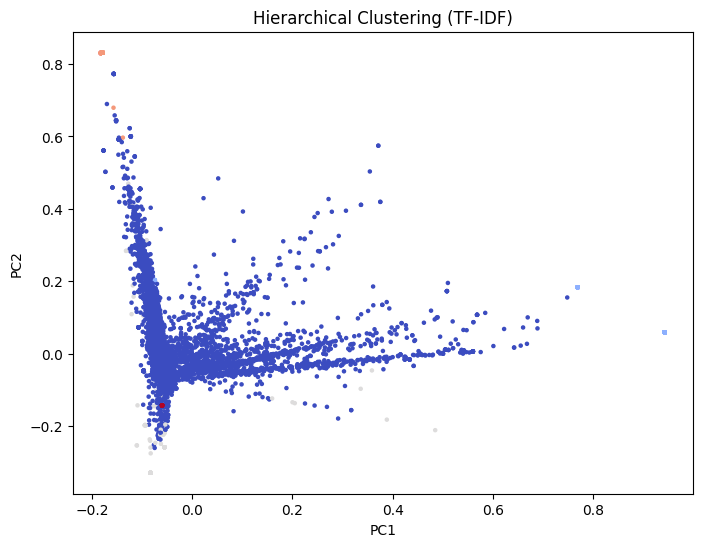

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=hier_labels, cmap="coolwarm", s=5)
plt.title("Hierarchical Clustering (TF-IDF)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Visualization of Word2Vec Clusters

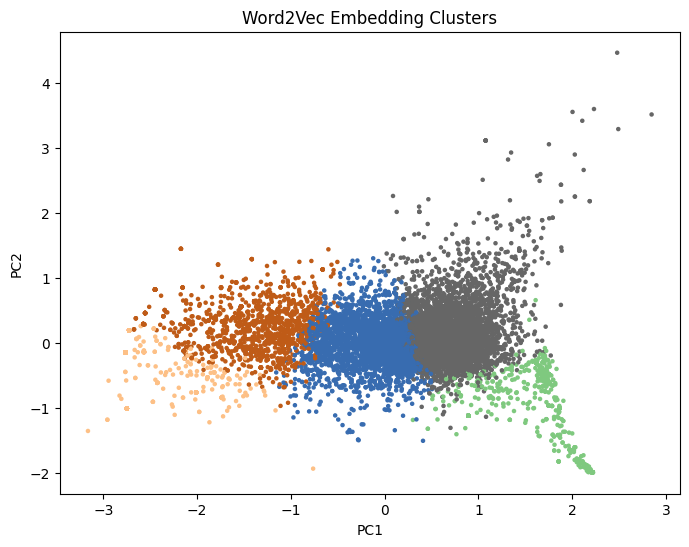

In [ ]:
pca_w2v = PCA(n_components=2)
reduced_w2v = pca_w2v.fit_transform(w2v_vectors)

plt.figure(figsize=(8,6))
plt.scatter(reduced_w2v[:,0], reduced_w2v[:,1], c=w2v_labels, cmap="Accent", s=5)
plt.title("Word2Vec Embedding Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means formed reasonably clean clusters on the TF–IDF representation, but it was sensitive to noisy data and had trouble separating reviews with overlapping vocabulary. DBSCAN handled dense regions and outliers better, yet in the high-dimensional TF–IDF space it labeled a large share of points as “noise.” Hierarchical clustering provided a useful view of how reviews merged as similarity thresholds changed, although the final cluster cuts were not very sharp. Word2Vec-based clustering improved semantic grouping by organizing reviews more by meaning than by raw word counts. BERT delivered the best overall structure: its contextual embeddings produced the most coherent and interpretable clusters, capturing deeper sentence-level relationships that the other methods missed.



# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

